<a href="https://colab.research.google.com/github/jainrasik/Customer-Segmentation-Rasik-Jain/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for a UK-based and registered non-store online. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [304]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Customer Segmentation-Rasik Jain/Online Retail.xlsx')

In [305]:
df.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [306]:
df.shape

(541909, 8)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [308]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [309]:
df[df['Description'].isnull()]

InvoiceNo StockCode Description  ...  UnitPrice CustomerID         Country
622       536414     22139         NaN  ...        0.0        NaN  United Kingdom
1970      536545     21134         NaN  ...        0.0        NaN  United Kingdom
1971      536546     22145         NaN  ...        0.0        NaN  United Kingdom
1972      536547     37509         NaN  ...        0.0        NaN  United Kingdom
1987      536549    85226A         NaN  ...        0.0        NaN  United Kingdom
...          ...       ...         ...  ...        ...        ...             ...
535322    581199     84581         NaN  ...        0.0        NaN  United Kingdom
535326    581203     23406         NaN  ...        0.0        NaN  United Kingdom
535332    581209     21620         NaN  ...        0.0        NaN  United Kingdom
536981    581234     72817         NaN  ...        0.0        NaN  United Kingdom
538554    581408     85175         NaN  ...        0.0        NaN  United Kingdom

[1454 rows x 8 columns]

In [310]:
df=df[~df['CustomerID'].isnull()]
df.shape

(406829, 8)

In [311]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [312]:
df=df[~df.duplicated()]
df.shape

(401604, 8)

In [313]:
df.describe()

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

In [314]:
df=df[~df.Quantity<0]

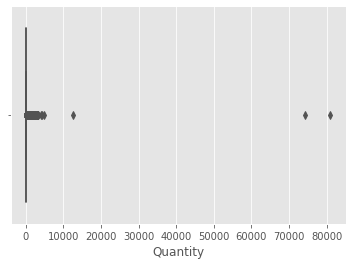

In [315]:
sns.boxplot(data=df,x='Quantity')

In [316]:
df.StockCode.value_counts()

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
47503J       1
90214Z       1
20667        1
20678        1
90128B       1
Name: StockCode, Length: 3665, dtype: int64

In [317]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [318]:
df['revenue']=df['Quantity']*df['UnitPrice']
df.head()

InvoiceNo StockCode  ...         Country  revenue
0    536365    85123A  ...  United Kingdom    15.30
1    536365     71053  ...  United Kingdom    20.34
2    536365    84406B  ...  United Kingdom    22.00
3    536365    84029G  ...  United Kingdom    20.34
4    536365    84029E  ...  United Kingdom    20.34

[5 rows x 9 columns]

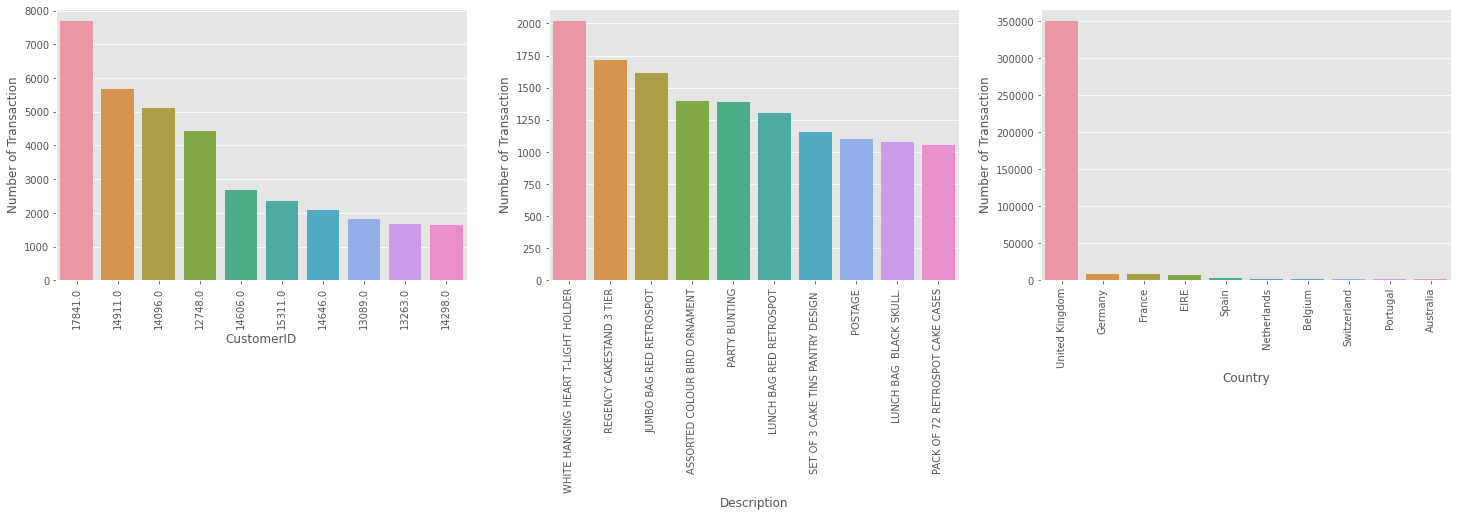

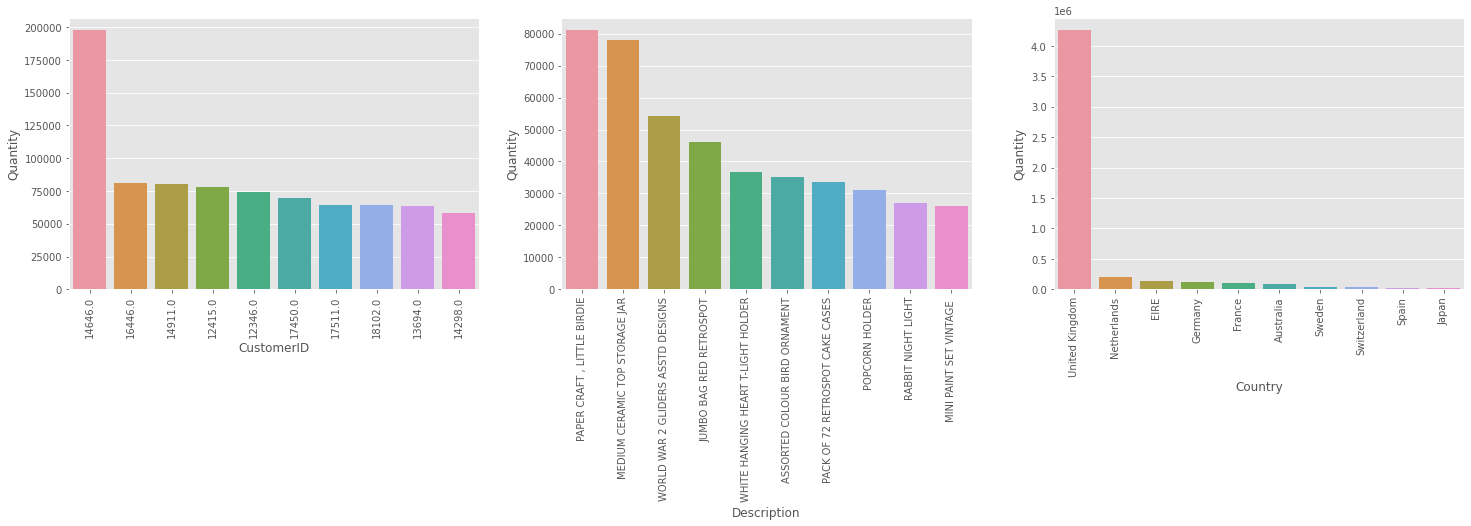

<Figure size 1800x360 with 0 Axes>

<Figure size 1800x360 with 0 Axes>

In [319]:
Categorical_Variable=['CustomerID','Description','Country']
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False).head(10).rename({'InvoiceNo':'Number of Transaction'},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y='Number of Transaction',order=data.sort_values(by='Number of Transaction',ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='Quantity'
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='UnitPrice'
plt.figure(figsize=[25,5])


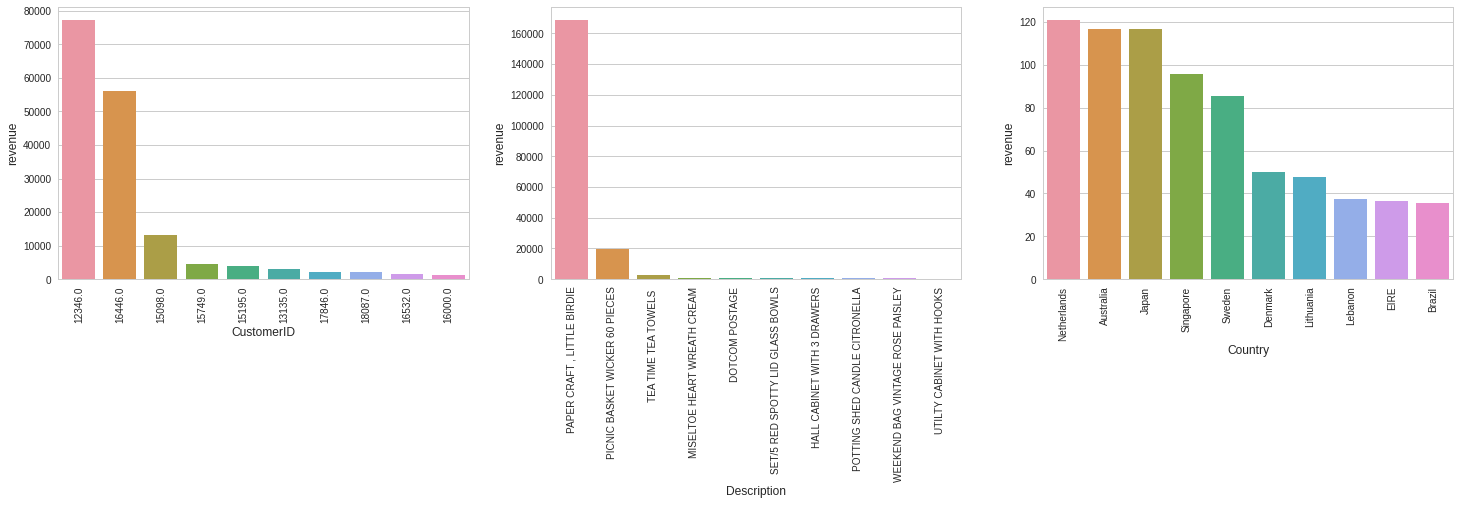

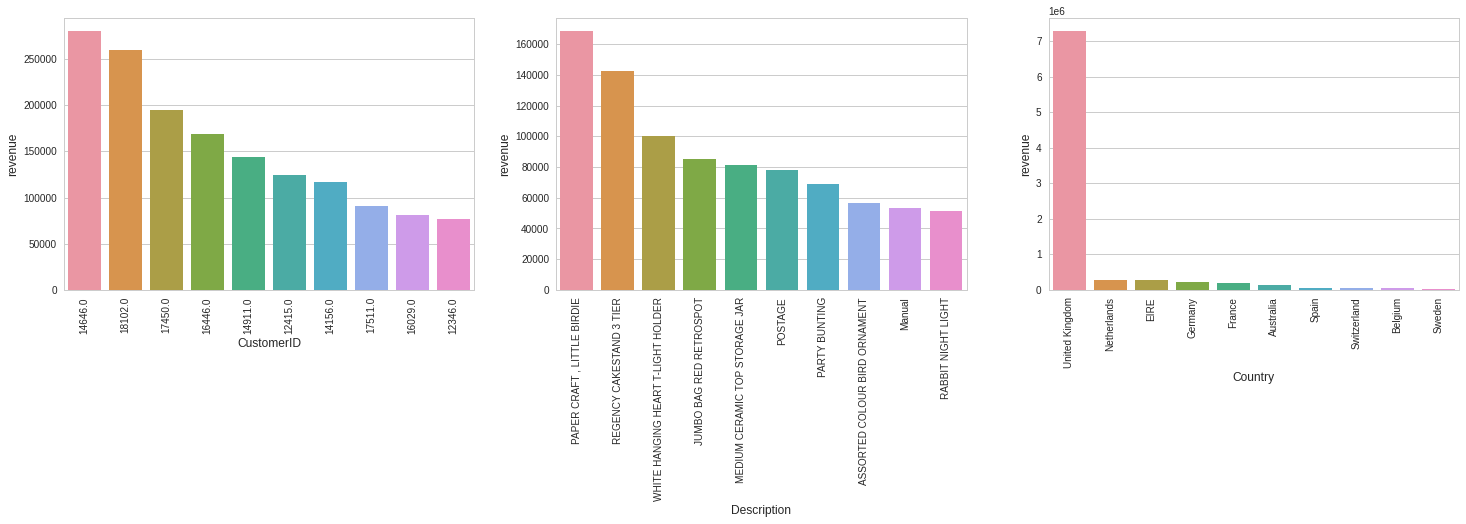

In [403]:
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].mean().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()
value='revenue'
plt.figure(figsize=[25,5])
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
plt.show()

In [321]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'revenue'],
      dtype='object')

In [322]:
df.InvoiceDate.dt.day_name().value_counts()

Thursday     79260
Wednesday    68043
Tuesday      65747
Monday       64237
Sunday       61214
Friday       54231
Name: InvoiceDate, dtype: int64

In [323]:
df.InvoiceDate.dt.month_name().value_counts()

November     63182
October      48796
December     42699
September    39671
May          28075
June         26926
March        26872
August       26796
July         26582
April        22435
January      20991
February     19707
Name: InvoiceDate, dtype: int64

In [324]:
Frq_df=pd.DataFrame()

In [325]:
Frq_df['Frequencycount']=df.groupby('CustomerID')['InvoiceNo'].count()

In [326]:
Frq_df

Frequencycount
CustomerID                
12346.0                  1
12347.0                182
12348.0                 31
12349.0                 73
12350.0                 17
...                    ...
18280.0                 10
18281.0                  7
18282.0                 12
18283.0                721
18287.0                 70

[4339 rows x 1 columns]

In [327]:
amt_df=pd.DataFrame()

In [328]:
amt_df=df.groupby('CustomerID')['revenue'].sum()

In [329]:
amt_df

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: revenue, Length: 4339, dtype: float64

In [330]:
ddd=pd.merge(Frq_df,amt_df,on='CustomerID',how='inner')

In [331]:
ddd

Frequencycount   revenue
CustomerID                          
12346.0                  1  77183.60
12347.0                182   4310.00
12348.0                 31   1797.24
12349.0                 73   1757.55
12350.0                 17    334.40
...                    ...       ...
18280.0                 10    180.60
18281.0                  7     80.82
18282.0                 12    178.05
18283.0                721   2045.53
18287.0                 70   1837.28

[4339 rows x 2 columns]

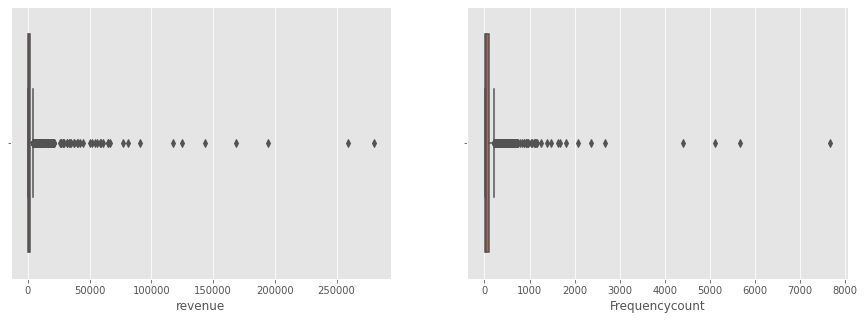

In [332]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=ddd,x='revenue')
plt.subplot(1,2,2)
sns.boxplot(data=ddd,x='Frequencycount')
plt.show()

In [333]:
IQR=ddd.revenue.quantile(0.75)-ddd.revenue.quantile(0.25)
ul=ddd.revenue.quantile(0.75)+1.5*IQR
ll=ddd.revenue.quantile(0.25)-1.5*IQR
print(ul,ll)
ddd=ddd[(ddd['revenue']>ll)&(ddd['revenue']<ul)]

3691.1050000000023 -1724.3350000000014


In [334]:
IQR=ddd.Frequencycount.quantile(0.75)-ddd.Frequencycount.quantile(0.25)
ul=ddd.Frequencycount.quantile(0.75)+1.5*IQR
ll=ddd.Frequencycount.quantile(0.25)-1.5*IQR
print(ul,ll)
ddd=ddd[(ddd['Frequencycount']>ll)&(ddd['Frequencycount']<ul)]

172.5 -79.5


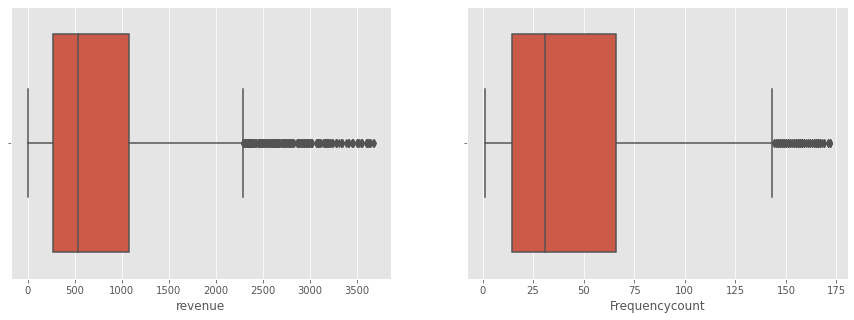

In [335]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=ddd,x='revenue')
plt.subplot(1,2,2)
sns.boxplot(data=ddd,x='Frequencycount')
plt.show()

In [396]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(ddd)
X=pd.DataFrame(ddd,columns=['Freq','amt'])
X.iloc[:,0]

0      -0.362465
1       0.681332
2      -0.710398
3       0.979560
4      -1.033478
          ...   
3658   -0.909216
3659   -0.884364
3660   -0.958921
3661   -0.834659
3662    0.606775
Name: Freq, Length: 3663, dtype: float64

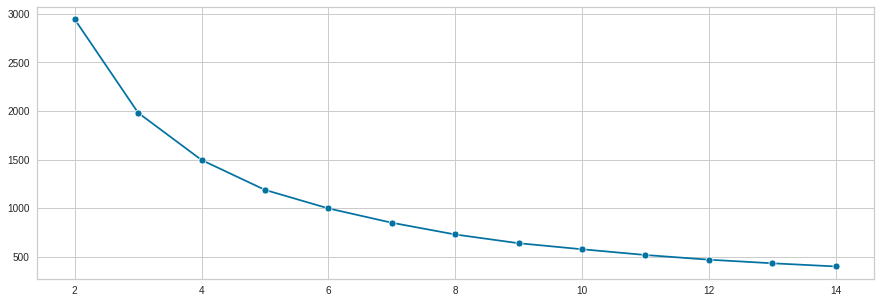

In [388]:
plt.figure(figsize=[15,5])
wcss=[]
for k in range(2,15):
  kmean=KMeans(n_clusters=k)
  kmean.fit(X)
  wcss.append(kmean.inertia_)
sns.lineplot(x=range(2,15),y=wcss,marker='o')
plt.show()

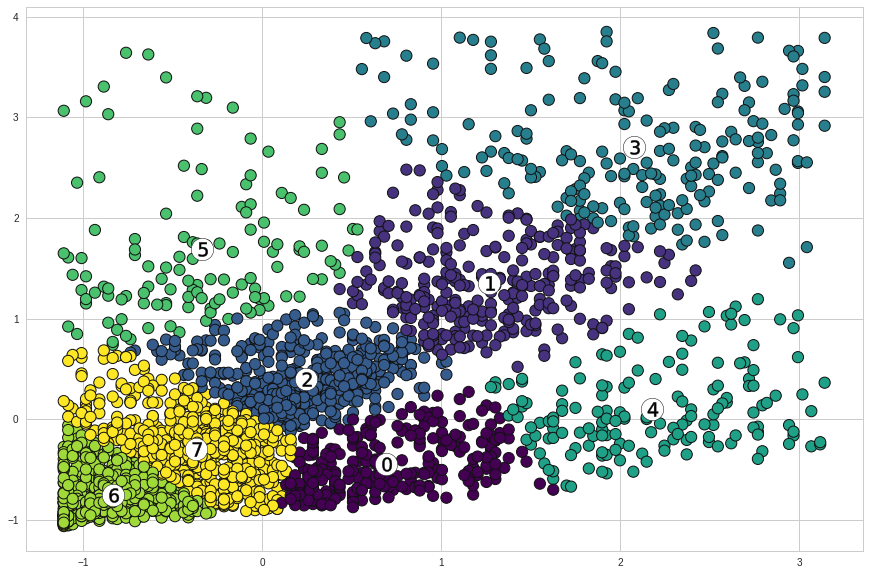

In [413]:
plt.figure(figsize=[15,10])
kmean=KMeans(n_clusters=8,random_state=0)
label=kmean.fit_predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',alpha=1,s=500,lw=1,edgecolors='K',cmap='viridis')
plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')
center=kmean.cluster_centers_
for i,c in enumerate(center):
 plt.scatter(c[0],c[1],c='black',marker='$%d$'%i, alpha=1, s=200, edgecolor='k')



In [438]:
class optimal_cluster:
  def __init__(self,X,K,nx):
    self.X=X
    self.K=K
    self.nx=nx
    self.ny=int(K/nx)
  def clusterplotsingle(self,n):
    kmean=KMeans(n_clusters=n,random_state=0)
    label=kmean.fit_predict(X)
    center=kmean.cluster_centers_
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',alpha=1,s=500,lw=1,edgecolors='K',cmap='viridis')
    plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')
    for i,c in enumerate(center):
     plt.scatter(c[0],c[1],c='black',marker='$%d$'%i, alpha=1, s=200, edgecolor='k')
    plt.show()

  def silhouteplot(self):
    ny=int(K/nx)
    plt.figure(figsize=[10*nx,10*ny])
    cluster_range=list(range(2,K+1))
    SAS=[]
    count=1
    for n,ncluster in enumerate(cluster_range):
      cluster=KMeans(n_clusters=ncluster,random_state=0)
      label=cluster.fit_predict(X)
      SAS.append(silhouette_score(X,label))
      SSS=silhouette_samples(X,label)
      ylower=10
      plt.subplot(ny,nx,count)
      for i in range(ncluster):
          temp=SSS[label==i]
          temp.sort()
          cs=temp.shape[0]
          yupper=ylower+cs
          plt.fill_betweenx(np.arange(ylower,yupper),temp)
          plt.text(-0.03,ylower+0.5*cluster_size,i)
          ylower=yupper
      count=count+1
      plt.axvline(SAS[n],color='b',linestyle='dashed',label = 'silhoute score = %0.2f' % SAS[n]) 
      plt.legend(loc='lower right',fontsize=15)
      plt.title('number of cluster = %s'%ncluster,fontsize=15)
      plt.xlabel("The silhouette coefficient values")
      plt.ylabel("Cluster label")
    plt.show()  
  def clusterplot(self):
    ny=int(K/nx)
    plt.figure(figsize=[10*nx,10*ny])
    count=1
    for n,ncluster in enumerate(cluster_range):
        cluster=KMeans(n_clusters=ncluster,random_state=0)
        label=cluster.fit_predict(X)
        plt.subplot(ny,nx,count)
        plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',s=500,lw=0.5,edgecolors='K',cmap='viridis')
        center=cluster.cluster_centers_
        plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')
        for i,c in enumerate(center):
          plt.scatter(c[0],c[1],c='black',marker='$%d$' %i, alpha=1, s=200, edgecolor='k')
        count=count+1
        plt.title('number of cluster = %s'%ncluster,fontsize=15)
        plt.xlabel("1st feature")
        plt.ylabel("2nd feature")
    plt.show()

In [441]:
a=optimal_cluster(X,K,5)

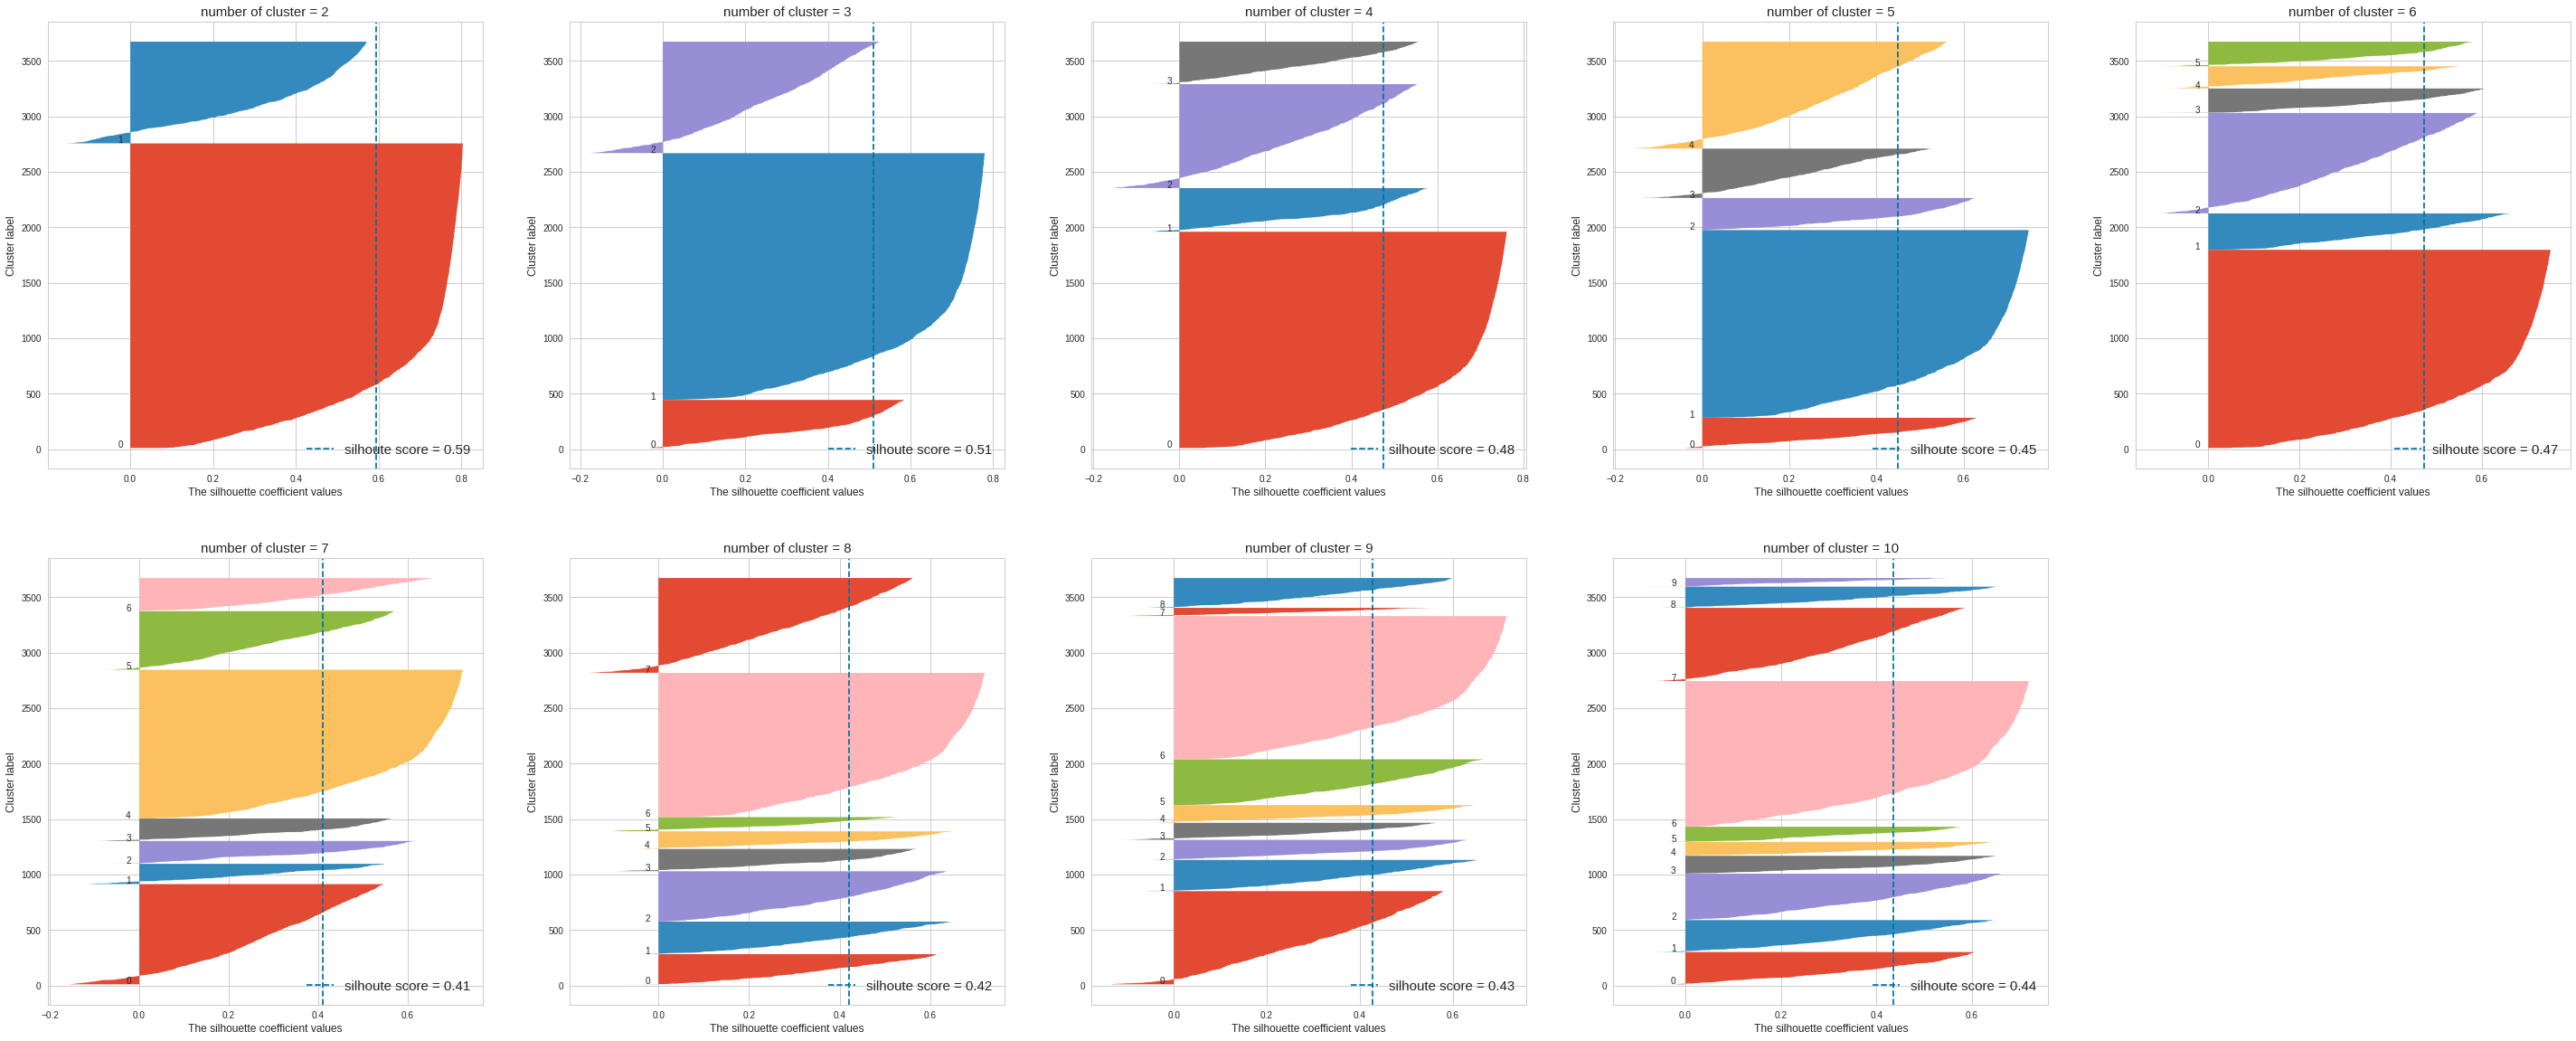

In [424]:
a.silhouteplot()

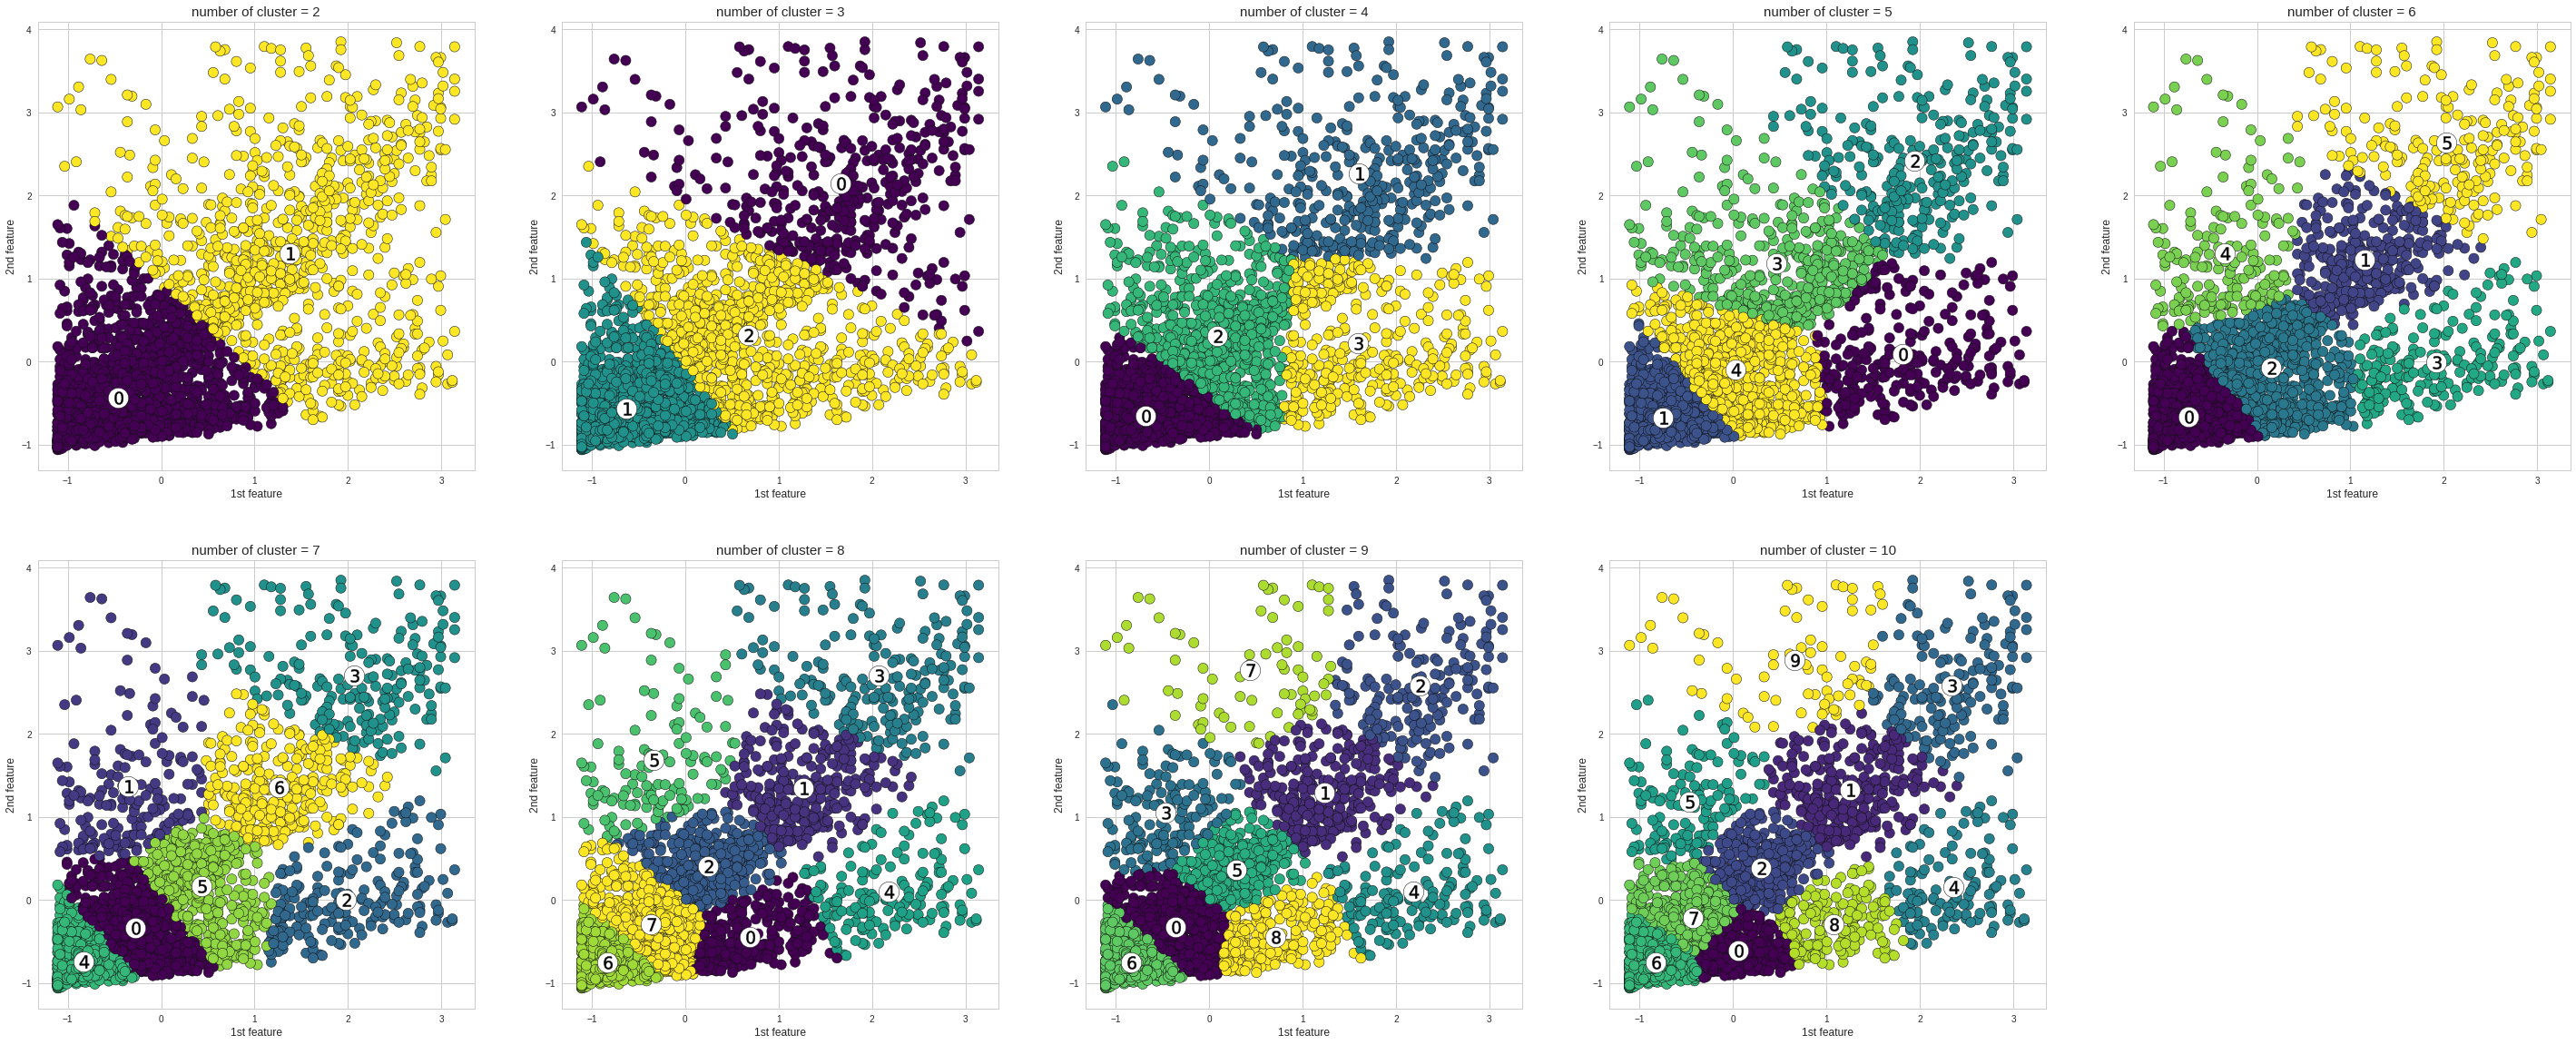

In [428]:
a.clusterplot()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f32b1f90>,
                 k=None, metric=None, model=None, timings=False)

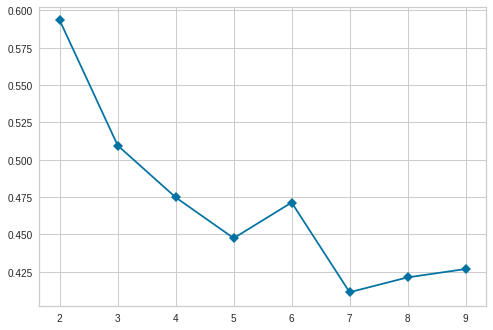

In [375]:
from yellowbrick.cluster import KElbowVisualizer
V=KElbowVisualizer(KMeans(),k=(2,10),metric='silhouette',timings=False,locate_elbow=False)
V.fit(X)

In [377]:
import scipy.cluster.hierarchy as sch

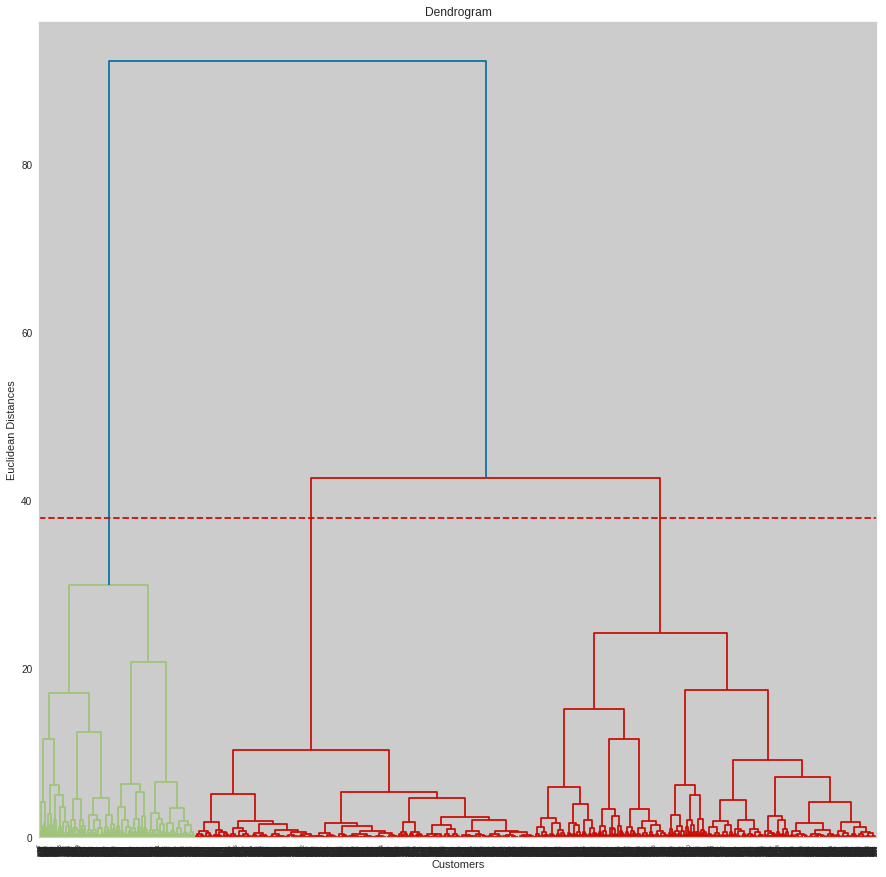

In [383]:
plt.figure(figsize=[15,15])
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=38, color='r', linestyle='--')

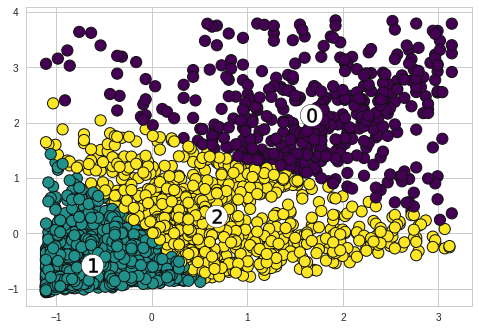

In [443]:
a.clusterplotsingle(3)